In [2]:
from musical.theory.note import Note
from musical.audio.playback import play
from musical.audio import source

import matplotlib.pyplot as plt
import plotly.express as px

from collections import defaultdict

In [3]:
g3 = Note('G3')

In [4]:
# Timeline

# XXX: Early implementation of timeline/hit concepts. Needs lots of work

# TODO: Associate sound source with Hit instances somehow
# TODO: Amplitude, possibly other dynamics attributes


class Hit:

    ''' Rough draft of Hit class. Stores information about the hit and generates
            the audio array accordingly. Currently implements a basic cache to avoid
            having to rerender identical hits
    '''

    cache = {}

    def __init__(self, note, length):
        self.note = note
        self.length = length

    def render(self):
        # Render hit of "key" for "length" amound of seconds
        # XXX: Currently only uses a string pluck
        key = (str(self.note), self.length)
        if key not in Hit.cache:
            Hit.cache[key] = source.pluck(self.note, self.length)
        return Hit.cache[key]


class Timeline:

    ''' Rough draft of Timeline class. Handles the timing and mixing of Hits
    '''

    def __init__(self, rate=44100):
        self.rate = rate
        self.hits = defaultdict(list)

    def add(self, time, hit):
        # Add "hit" at "time" seconds in
        self.hits[time].append(hit)

    def calculate_length(self):
        # Determine length of playback from end of last hit
        length = 0.0
        for time, hits in self.hits.items():
            for hit in hits:
                length = max(length, time + hit.length)
        return length

    def render(self):
        # Return timeline as audio array by rendering the hits
        out = source.silence(self.calculate_length())
        for time, hits in self.hits.items():
            index = int(time * self.rate)
            for hit in hits:
                data = hit.render()
                out[index:index + len(data)] += data
        return out


In [5]:
hit = Hit(g3, 1)

In [6]:
hit.render()

array([-0.98229984,  0.71362941, -0.52598145, ..., -0.04321499,
       -0.03437576, -0.02570174])

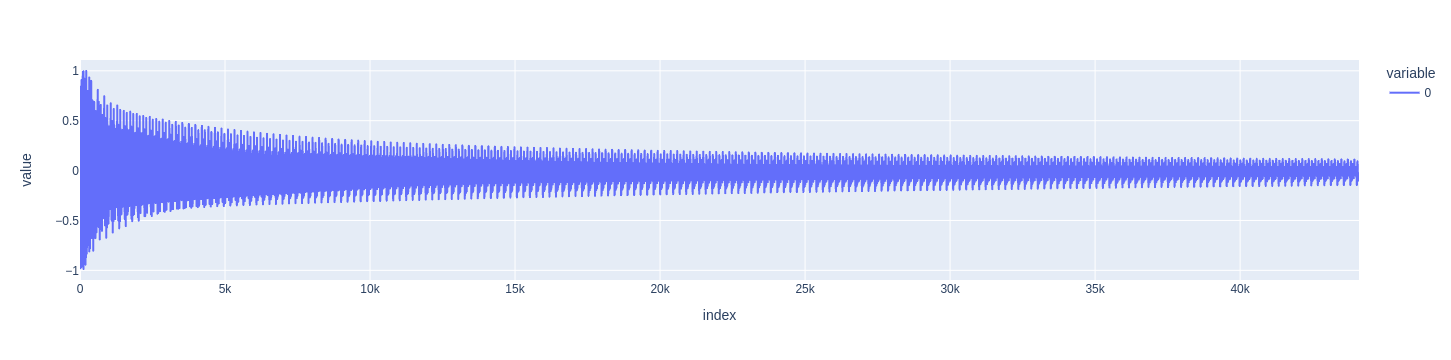

In [8]:
px.line(hit.render())

In [9]:
play(hit.render())